In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [3]:
base_path = r"C:\Users\ravit\project cycle\banana_classification"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "valid")

In [5]:
img_size = (150, 150)  
batch_size = 32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,   
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
val_datagen = ImageDataGenerator(rescale=1.0/255) 


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11793 images belonging to 4 classes.


In [11]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1123 images belonging to 4 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  
    Dense(4, activation='softmax')  
])


In [21]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
epochs = 10
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=epochs)


Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 254s 681ms/step - accuracy: 0.5491 - loss: 1.0652 - val_accuracy: 0.8094 - val_loss: 0.4738
Epoch 2/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 230s 623ms/step - accuracy: 0.8543 - loss: 0.3914 - val_accuracy: 0.9127 - val_loss: 0.2546
Epoch 3/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 221s 600ms/step - accuracy: 0.8905 - loss: 0.3082 - val_accuracy: 0.9110 - val_loss: 0.2695
Epoch 4/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 263s 601ms/step - accuracy: 0.8983 - loss: 0.2769 - val_accuracy: 0.9386 - val_loss: 0.2001
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 222s 601ms/step - accuracy: 0.9066 - loss: 0.2701 - val_accuracy: 0.9403 - val_loss: 0.1759
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 262s 602ms/step - accuracy: 0.9168 - loss: 0.2371 - val_accuracy: 0.9466 - val_loss: 0.1712
Epoch 7/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 262s 602ms/step - accuracy: 0.9192 - loss: 0.2308 - val_accuracy: 0.8736 - val_loss: 0.3600
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 269s 620ms/step - accuracy: 0.9270 -

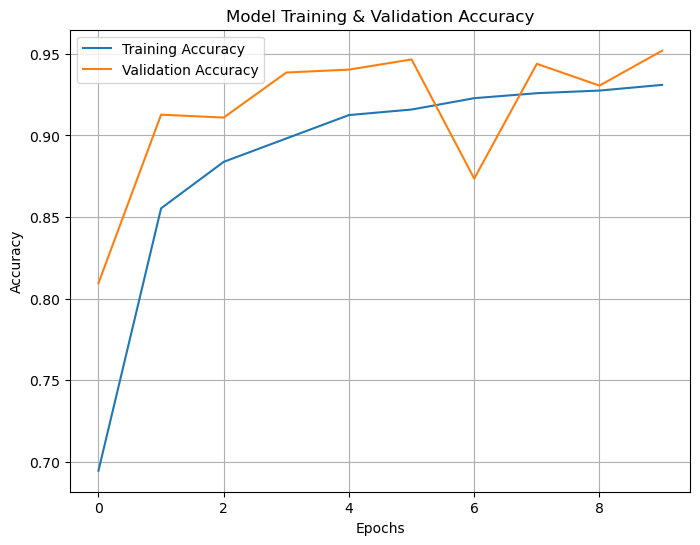

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training & Validation Accuracy')
plt.grid()
plt.show()

In [29]:
model.save("banana_quality_model.keras")


In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os


model = tf.keras.models.load_model("banana_quality_model.keras")

base_path = r"C:\Users\ravit\project cycle\banana_classification"
test_path = os.path.join(base_path, "test")

img_size = (150, 150)  
batch_size = 32  


test_datagen = ImageDataGenerator(rescale=1.0/255)


test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False 
)


predictions = model.predict(test_generator)


predicted_classes = np.argmax(predictions, axis=1)


true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


print("\nSample Predictions:")
for i in range(10):
    print(f"Actual: {class_labels[true_classes[i]]}, Predicted: {class_labels[predicted_classes[i]]}")


Found 562 images belonging to 4 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step
Test Accuracy: 94.13%

Sample Predictions:
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
Actual: overripe, Predicted: overripe
